In [2]:
import sys
sys.path.append("../../build-libs-Desktop_Qt_5_15_1_GCC_64bit-Debug/core/wrappers/python")  # set to correct path for module"
import rtbotpy

In [7]:
import pandas as pd
import numpy as np
dir="../data/label" #"../../measurement-labeler/data/ios"# 
name="CF68BF40-ABB1-4DA7-985D-233961881550"#"3BCA2378-6422-440D-B6C8-6F4B96FEA93C"#
ppg=np.loadtxt(f"{dir}/{name}.csv", skiprows=1, delimiter=',')
dt=(ppg[-1,0]-ppg[0,0])/(ti.size-1)
dataL=pd.read_table(f"{dir}/{name}-labels.csv")
peakL = np.asarray(dataL['SP'], dtype='int64')

In [22]:
import json
with open('../data/label/ppg.json', 'r') as f:
  prog = json.load(f)

pipe=rtbotpy.Pipeline(json.dumps(prog))
peak=[]
for t,v in ppg:
    out=pipe.receiveDebug(rtbotpy.Message(int(t*1000),-v))
    if (out.get("o1")): 
        msg=out.get("o1")[0]
        peak += [[msg.time,msg.value]]
peak=np.array(peak)  

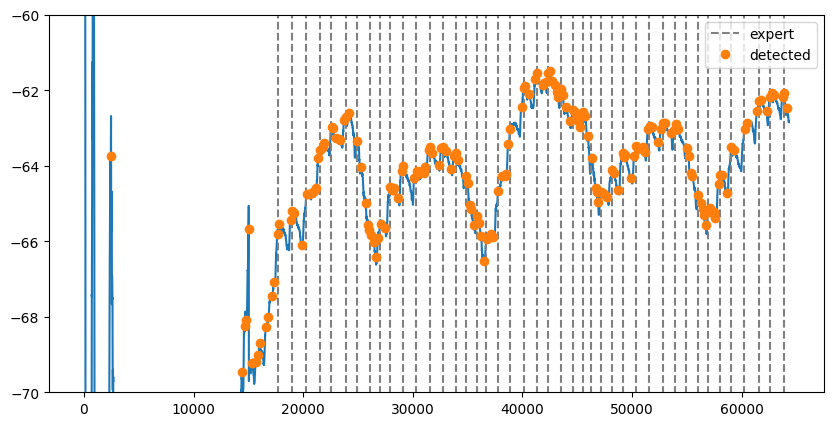

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5),dpi=100)
plt.plot(ppg[:,0], -ppg[:,1])
plt.vlines(peakL,-80,-40, linestyles='--', color="gray", label="expert" )
plt.plot(peak[:,0]/1000, peak[:,1], 'o', label="detected")
plt.ylim(-70,-60)
plt.legend()

In [ ]:
msgs=[
rtbotpy.Sample